# Exploiration de la dataset FD001


## Importation des bibliothèques et données pour faire de l'analyse descriptive

In [16]:
#pip install xgboost
#importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importation de bibliothèque Skelearn
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import absolute_mean_error

# Importation des données : données d'entrainement(data_train),données test (data_test), données de validation (data_RUL)
data_train= pd.read_csv("train_FD001.txt",sep=" ",header=None)
data_test = pd.read_csv("test_FD001.txt",sep=" ",header=None)
data_RUL = pd.read_csv("RUL_FD001.txt",sep=" ",header=None)

In [17]:
#Visionnage de la tête de la dataset d'entrainement
data_train.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

In [18]:
#vionnage de la summary de la dataset d'entrainement
data_train.describe()

0             1             2             3        4   \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

                 5             6             7             8             9   \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

       ...            18            19            20            21       22  \
count  ...  20631.000000  20631.000000  2.063100e+04  20631.000000  20631.0   
mean   ...   8143.752722      8.442146  3.000000e-02    393.210654   2388.0   
std    ...     19.076176      0.037505  1.556432e-14      1.548763      0.0   
min    ...   8099.940000      8.324900  3.000000e-02    388.000000   2388.0   
25%    ...   8133.245000      8.414900  3.000000e-02    392.000000   2388.0   
50%    ...   8140.540000      8.438900  3.000000e-02    393.000000   2388.0   
75%    ...   8148.310000      8.465600  3.000000e-02    394.000000   2388.0   
max    ...   8293.720000      8.584800  3.000000e-02    400.000000   2388.0   

            23            24            25   26   27  
count  20631.0  20631.000000  20631.000000  0.0  0.0  
mean     100.0     38.816271     23.289705  NaN  NaN  
std        0.0      0.180746      0.108251  NaN  NaN  
min      100.0     38.140000     22.894200  NaN  NaN  
25%      100.0     38.700000     23.221800  NaN  NaN  
50%      100.0     38.830000     23.297900  NaN  NaN  
75%      100.0     38.950000     23.366800  NaN  NaN  
max      100.0     39.430000     23.618400  NaN  NaN  

[8 rows x 28 columns]

In [19]:
#vionnage de la summary de la dataset test
data_test.describe()

0             1             2             3        4   \
count  13096.000000  13096.000000  13096.000000  13096.000000  13096.0   
mean      51.543907     76.836515     -0.000011      0.000004    100.0   
std       28.289423     53.057749      0.002203      0.000294      0.0   
min        1.000000      1.000000     -0.008200     -0.000600    100.0   
25%       28.000000     33.000000     -0.001500     -0.000200    100.0   
50%       52.000000     69.000000      0.000000      0.000000    100.0   
75%       76.000000    113.000000      0.001500      0.000300    100.0   
max      100.000000    303.000000      0.007800      0.000700    100.0   

                 5             6             7             8             9   \
count  1.309600e+04  13096.000000  13096.000000  13096.000000  1.309600e+04   
mean   5.186700e+02    642.475088   1588.099204   1404.735362  1.462000e+01   
std    6.014263e-11      0.400899      5.003274      6.688309  2.671743e-12   
min    5.186700e+02    641.130000   1569.040000   1384.390000  1.462000e+01   
25%    5.186700e+02    642.197500   1584.600000   1399.950000  1.462000e+01   
50%    5.186700e+02    642.460000   1587.990000   1404.440000  1.462000e+01   
75%    5.186700e+02    642.740000   1591.362500   1409.050000  1.462000e+01   
max    5.186700e+02    644.300000   1607.550000   1433.360000  1.462000e+01   

       ...            18            19            20            21       22  \
count  ...  13096.000000  13096.000000  1.309600e+04  13096.000000  13096.0   
mean   ...   8138.947817      8.425844  3.000000e-02    392.571625   2388.0   
std    ...     10.188605      0.029009  8.823140e-15      1.233577      0.0   
min    ...   8108.500000      8.332800  3.000000e-02    389.000000   2388.0   
25%    ...   8132.310000      8.405600  3.000000e-02    392.000000   2388.0   
50%    ...   8138.390000      8.424900  3.000000e-02    393.000000   2388.0   
75%    ...   8144.360000      8.444300  3.000000e-02    393.000000   2388.0   
max    ...   8220.480000      8.541400  3.000000e-02    397.000000   2388.0   

            23            24            25   26   27  
count  13096.0  13096.000000  13096.000000  0.0  0.0  
mean     100.0     38.892502     23.335743  NaN  NaN  
std        0.0      0.141681      0.084120  NaN  NaN  
min      100.0     38.310000     22.935400  NaN  NaN  
25%      100.0     38.800000     23.281600  NaN  NaN  
50%      100.0     38.900000     23.339200  NaN  NaN  
75%      100.0     38.990000     23.393600  NaN  NaN  
max      100.0     39.410000     23.641900  NaN  NaN  

[8 rows x 28 columns]

In [20]:
#vionnage de la summary de la dataset de validation
data_RUL.describe()

0    1
count  100.00000  0.0
mean    75.52000  NaN
std     41.76497  NaN
min      7.00000  NaN
25%     32.75000  NaN
50%     86.00000  NaN
75%    112.25000  NaN
max    145.00000  NaN

## Analyse descriptive

In [21]:
# on enlève les colonnes qui ne nous apporte aucune information concernant les cycles  à savoir les colonnes 
# 26 et 27 pour les données test et ceului d'entrainement 
#et la conlone 1 de la data RUL

data_train.drop(columns=[26,27],inplace=True)
data_test.drop(columns=[26,27],inplace=True)
data_RUL.drop(columns=[1],inplace=True)

In [22]:
# on affecte des noms aux columns de la dataset Test et entrainement
columns = ['unit_number','time_in_cycles','setting_1','setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

data_train.columns=columns
data_test.columns=columns

In [23]:
data_train.head()

unit_number  time_in_cycles  setting_1  setting_2    TRA      T2     T24  \
0            1               1    -0.0007    -0.0004  100.0  518.67  641.82   
1            1               2     0.0019    -0.0003  100.0  518.67  642.15   
2            1               3    -0.0043     0.0003  100.0  518.67  642.35   
3            1               4     0.0007     0.0000  100.0  518.67  642.35   
4            1               5    -0.0019    -0.0002  100.0  518.67  642.37   

       T30      T50     P2  ...     phi      NRf      NRc     BPR  farB  \
0  1589.70  1400.60  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03   
1  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   
2  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   
3  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   
4  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   

   htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
0      392    2388      100.0  39.06  23.4190  
1      392    2388      100.0  39.00  23.4236  
2      390    2388      100.0  38.95  23.3442  
3      392    2388      100.0  38.88  23.3739  
4      393    2388      100.0  38.90  23.4044  

[5 rows x 26 columns]

In [24]:
#vionnage du resumé de la dataset d'entrainement

data_train.describe()

unit_number  time_in_cycles     setting_1     setting_2      TRA  \
count  20631.000000    20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568      108.807862     -0.000009      0.000002    100.0   
std       29.227633       68.880990      0.002187      0.000293      0.0   
min        1.000000        1.000000     -0.008700     -0.000600    100.0   
25%       26.000000       52.000000     -0.001500     -0.000200    100.0   
50%       52.000000      104.000000      0.000000      0.000000    100.0   
75%       77.000000      156.000000      0.001500      0.000300    100.0   
max      100.000000      362.000000      0.008700      0.000600    100.0   

                 T2           T24           T30           T50            P2  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

       ...           phi           NRf           NRc           BPR  \
count  ...  20631.000000  20631.000000  20631.000000  20631.000000   
mean   ...    521.413470   2388.096152   8143.752722      8.442146   
std    ...      0.737553      0.071919     19.076176      0.037505   
min    ...    518.690000   2387.880000   8099.940000      8.324900   
25%    ...    520.960000   2388.040000   8133.245000      8.414900   
50%    ...    521.480000   2388.090000   8140.540000      8.438900   
75%    ...    521.950000   2388.140000   8148.310000      8.465600   
max    ...    523.380000   2388.560000   8293.720000      8.584800   

               farB       htBleed   Nf_dmd  PCNfR_dmd           W31  \
count  2.063100e+04  20631.000000  20631.0    20631.0  20631.000000   
mean   3.000000e-02    393.210654   2388.0      100.0     38.816271   
std    1.556432e-14      1.548763      0.0        0.0      0.180746   
min    3.000000e-02    388.000000   2388.0      100.0     38.140000   
25%    3.000000e-02    392.000000   2388.0      100.0     38.700000   
50%    3.000000e-02    393.000000   2388.0      100.0     38.830000   
75%    3.000000e-02    394.000000   2388.0      100.0     38.950000   
max    3.000000e-02    400.000000   2388.0      100.0     39.430000   

                W32  
count  20631.000000  
mean      23.289705  
std        0.108251  
min       22.894200  
25%       23.221800  
50%       23.297900  
75%       23.366800  
max       23.618400  

[8 rows x 26 columns]

In [25]:
#visionnage de la la structuration de la dataset d'entrainement
data_train_cycles = data_train.loc[:, 'unit_number':'time_in_cycles']
data_train_cycles

unit_number  time_in_cycles
0                1               1
1                1               2
2                1               3
3                1               4
4                1               5
...            ...             ...
20626          100             196
20627          100             197
20628          100             198
20629          100             199
20630          100             200

[20631 rows x 2 columns]

In [26]:
#Visionnage des lignes uniques de la dataset d'entraînement  
print("Unit_number " , data_train.unit_number.unique())

Unit_number  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [27]:
#vionnage du resumé des cycles maximales des 100 moteurs de la dataset data_train 
data_train_max= data_train.groupby('unit_number')['time_in_cycles'].max().reset_index()
data_train_max.describe()


unit_number  time_in_cycles
count   100.000000      100.000000
mean     50.500000      206.310000
std      29.011492       46.342749
min       1.000000      128.000000
25%      25.750000      177.000000
50%      50.500000      199.000000
75%      75.250000      229.250000
max     100.000000      362.000000

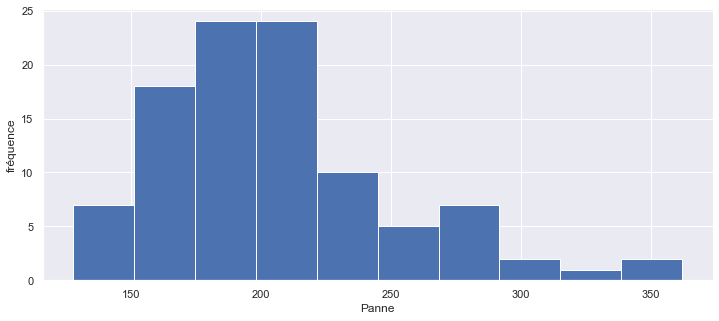

In [28]:
# histogramme des cycles maximales des 100 moteur de la dataset data_train 
data_train_max['time_in_cycles'].hist(bins=10, figsize=(12,5))
plt.xlabel('Panne')
plt.ylabel('fréquence')
plt.show()

### Calcul du RUL dans la dataset data_train (données d'entraînement)

In [29]:
# on regroupe la data train par moteur(unit_number ) et on récupére le maximun de chaque group
#L'ensemble est stocké dans data_train_cycles_panne

data_train_cycles_panne = pd.DataFrame(data_train.groupby('unit_number')['time_in_cycles'].max()).reset_index()
data_train_cycles_panne.columns = ['unit_number', 'failure']
 
# une fois la nouvelle data data_train_cycles_panne créée on la merge avec la data de depart, ici la data_train 
#afin de calculer la RUL

data_train=data_train.merge(data_train_cycles_panne,on=['unit_number'],how='left')
#calcul du RUL dans la dataset data_train
data_train['RUL']=data_train['failure']-data_train["time_in_cycles"]
data_train

unit_number  time_in_cycles  setting_1  setting_2    TRA      T2  \
0                1               1    -0.0007    -0.0004  100.0  518.67   
1                1               2     0.0019    -0.0003  100.0  518.67   
2                1               3    -0.0043     0.0003  100.0  518.67   
3                1               4     0.0007     0.0000  100.0  518.67   
4                1               5    -0.0019    -0.0002  100.0  518.67   
...            ...             ...        ...        ...    ...     ...   
20626          100             196    -0.0004    -0.0003  100.0  518.67   
20627          100             197    -0.0016    -0.0005  100.0  518.67   
20628          100             198     0.0004     0.0000  100.0  518.67   
20629          100             199    -0.0011     0.0003  100.0  518.67   
20630          100             200    -0.0032    -0.0005  100.0  518.67   

          T24      T30      T50     P2  ...      NRc     BPR  farB  htBleed  \
0      641.82  1589.70  1400.60  14.62  ...  8138.62  8.4195  0.03      392   
1      642.15  1591.82  1403.14  14.62  ...  8131.49  8.4318  0.03      392   
2      642.35  1587.99  1404.20  14.62  ...  8133.23  8.4178  0.03      390   
3      642.35  1582.79  1401.87  14.62  ...  8133.83  8.3682  0.03      392   
4      642.37  1582.85  1406.22  14.62  ...  8133.80  8.4294  0.03      393   
...       ...      ...      ...    ...  ...      ...     ...   ...      ...   
20626  643.49  1597.98  1428.63  14.62  ...  8137.60  8.4956  0.03      397   
20627  643.54  1604.50  1433.58  14.62  ...  8136.50  8.5139  0.03      395   
20628  643.42  1602.46  1428.18  14.62  ...  8141.05  8.5646  0.03      398   
20629  643.23  1605.26  1426.53  14.62  ...  8139.29  8.5389  0.03      395   
20630  643.85  1600.38  1432.14  14.62  ...  8137.33  8.5036  0.03      396   

       Nf_dmd  PCNfR_dmd    W31      W32  failure  RUL  
0        2388      100.0  39.06  23.4190      192  191  
1        2388      100.0  39.00  23.4236      192  190  
2        2388      100.0  38.95  23.3442      192  189  
3        2388      100.0  38.88  23.3739      192  188  
4        2388      100.0  38.90  23.4044      192  187  
...       ...        ...    ...      ...      ...  ...  
20626    2388      100.0  38.49  22.9735      200    4  
20627    2388      100.0  38.30  23.1594      200    3  
20628    2388      100.0  38.44  22.9333      200    2  
20629    2388      100.0  38.29  23.0640      200    1  
20630    2388      100.0  38.37  23.0522      200    0  

[20631 rows x 28 columns]

## Sélection des variables

### Corrélation entre les variables explicatives et la variable d'intérêt ici  RUL du unit ayant le cycle le plus long la dataset d'entrainement

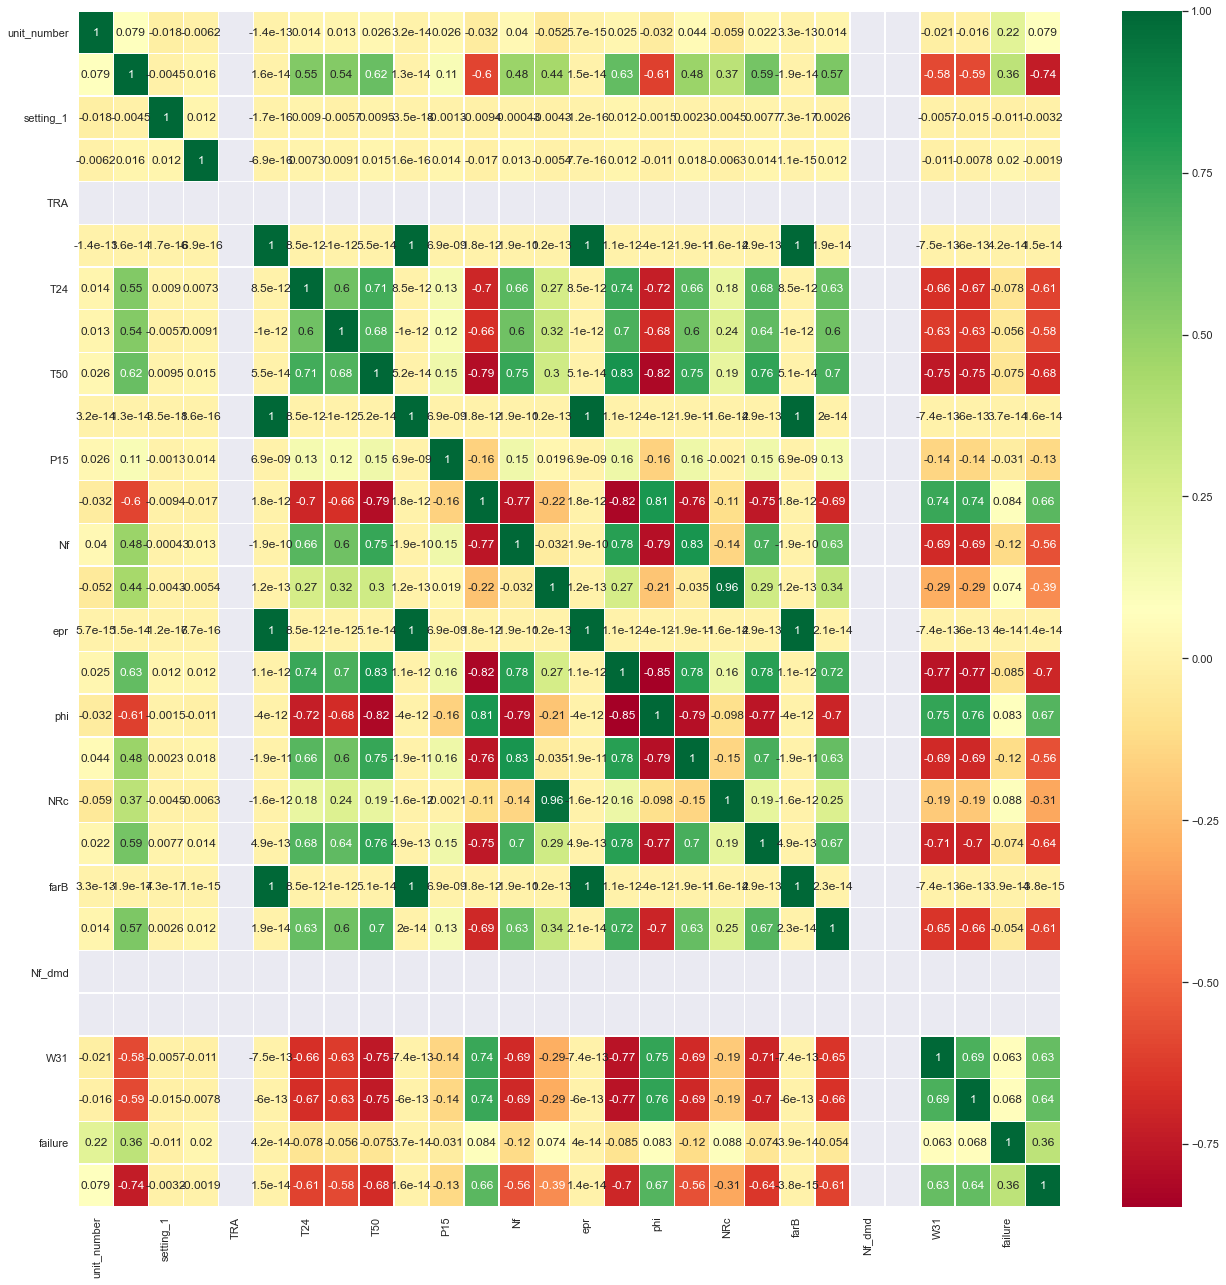

In [15]:
sns.set()
#data_train.drop(columns=[26,27],inplace=True)
data=data_train[selection1]
sns.heatmap(data_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.5)
fig=plt.gcf()
fig.set_size_inches(22,22)
plt.show()

In [32]:
# matrice de correlation entre "RUL" et les paramètres opératoires
# on choisi ici le moteur qui a le cycle le plus long pour mieux étudier les corrélation 
# On utilise la fonction idxmax pour acceder à l'indice ayant  la valeur max 
# La méthode loc est utilisé ici pour avoir accès à cet id

id_moteurPerf= data_train.loc[data_train['time_in_cycles'].idxmax(),['unit_number','time_in_cycles']]
# L'id trouvé est la 69

# on cherche desormais à soir le nombre de ligne du moteur ayant l'id 69

moteur_perf= data_train.loc[data_train['unit_number']==69]
moteur_perf

unit_number  time_in_cycles  setting_1  setting_2    TRA      T2  \
13631           69               1    -0.0014    -0.0001  100.0  518.67   
13632           69               2    -0.0003    -0.0004  100.0  518.67   
13633           69               3     0.0006    -0.0003  100.0  518.67   
13634           69               4    -0.0001    -0.0003  100.0  518.67   
13635           69               5     0.0026     0.0002  100.0  518.67   
...            ...             ...        ...        ...    ...     ...   
13988           69             358     0.0040    -0.0002  100.0  518.67   
13989           69             359     0.0013     0.0003  100.0  518.67   
13990           69             360     0.0004    -0.0001  100.0  518.67   
13991           69             361     0.0016    -0.0002  100.0  518.67   
13992           69             362     0.0007    -0.0000  100.0  518.67   

          T24      T30      T50     P2  ...      NRc     BPR  farB  htBleed  \
13631  641.96  1587.10  1400.65  14.62  ...  8136.88  8.4094  0.03      392   
13632  641.50  1594.24  1401.54  14.62  ...  8139.88  8.4172  0.03      392   
13633  642.73  1585.41  1405.22  14.62  ...  8136.42  8.3869  0.03      392   
13634  642.00  1586.57  1408.44  14.62  ...  8142.92  8.3890  0.03      391   
13635  642.37  1582.60  1403.07  14.62  ...  8138.93  8.4042  0.03      392   
...       ...      ...      ...    ...  ...      ...     ...   ...      ...   
13988  643.74  1609.53  1428.26  14.62  ...  8129.59  8.5460  0.03      397   
13989  643.46  1603.83  1429.82  14.62  ...  8131.20  8.5116  0.03      396   
13990  643.97  1597.75  1428.85  14.62  ...  8126.63  8.5059  0.03      396   
13991  643.65  1603.50  1433.95  14.62  ...  8132.97  8.5270  0.03      396   
13992  643.75  1598.16  1428.28  14.62  ...  8124.27  8.5126  0.03      397   

       Nf_dmd  PCNfR_dmd    W31      W32  failure  RUL  
13631    2388      100.0  38.87  23.4081      362  361  
13632    2388      100.0  39.02  23.4189      362  360  
13633    2388      100.0  38.82  23.3756      362  359  
13634    2388      100.0  38.99  23.2744      362  358  
13635    2388      100.0  38.87  23.3195      362  357  
...       ...        ...    ...      ...      ...  ...  
13988    2388      100.0  38.53  23.0549      362    4  
13989    2388      100.0  38.28  23.0610      362    3  
13990    2388      100.0  38.47  23.0422      362    2  
13991    2388      100.0  38.52  23.1208      362    1  
13992    2388      100.0  38.42  22.9782      362    0  

[362 rows x 28 columns]

In [ ]:
# matrice de correlation 
sns.set()
sns.heatmap(moteur_perf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()
# attention seulement les noms 1 colonnes sur 2 sont imprimés

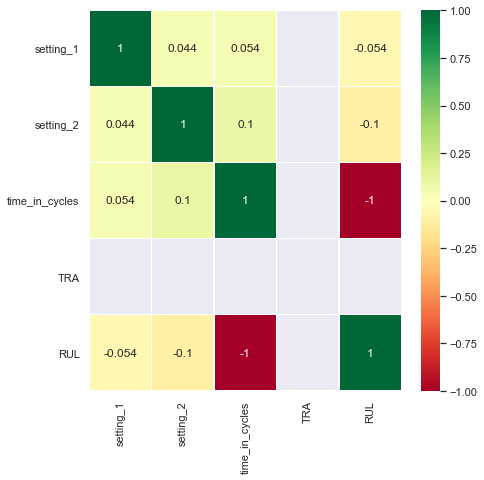

In [21]:
# matrice de correlation entre "RUL", "time_in cycle" et les paramètres opératoires
sns.set()
cols = ['setting_1','setting_2','time_in_cycles','TRA',"RUL"]
sns.heatmap(moteur_perf[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()
#sns.pairplot(data_train[cols], size = 3)
#plt.show();

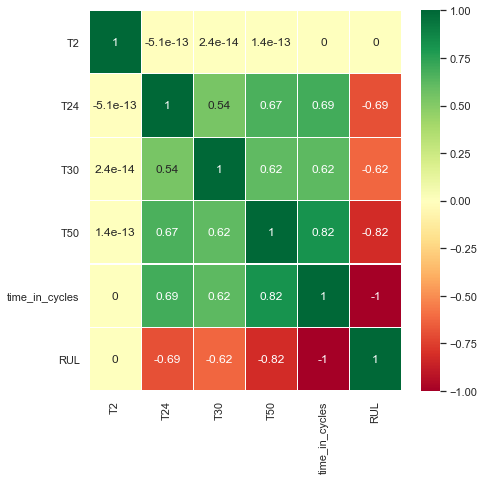

In [22]:
# matrice de correlation entre "RUL", "time_in cycle" et les températures
sns.set()
cols = ['T2','T24','T30','T50','time_in_cycles',"RUL"]
sns.heatmap(moteur_perf[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

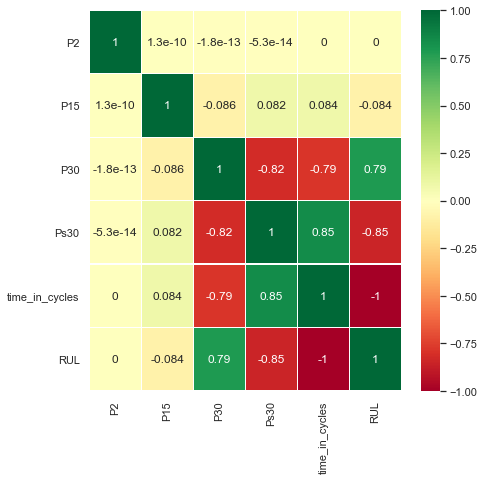

In [23]:
# matrice de correlation entre "RUL", "time_in cycle" et les préssions
sns.set()
cols = ['P2','P15','P30','Ps30','time_in_cycles',"RUL"]
sns.heatmap(moteur_perf[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

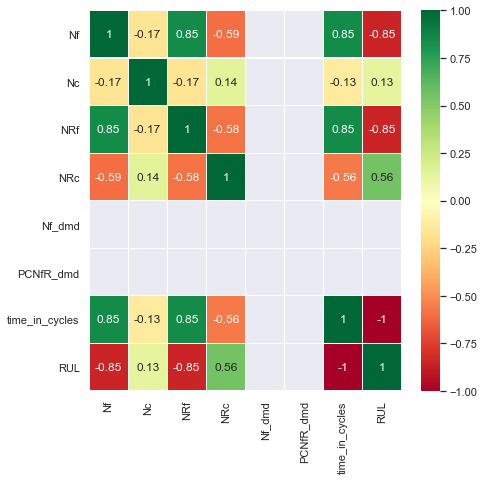

In [24]:
# matrice de correlation entre "RUL", "time_in cycle" et les paramètres de rotation 
sns.set()
cols = ['Nf','Nc','NRf','NRc','Nf_dmd','PCNfR_dmd','time_in_cycles',"RUL"]
sns.heatmap(moteur_perf[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

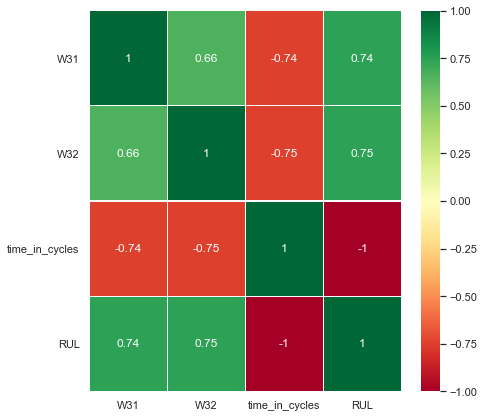

In [25]:

# matrice de correlation entre "RUL", "time_in cycle" et les débits du liquide de refroidissemnt 
sns.set()
cols = ['W31','W32','time_in_cycles',"RUL"]
sns.heatmap(moteur_perf[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

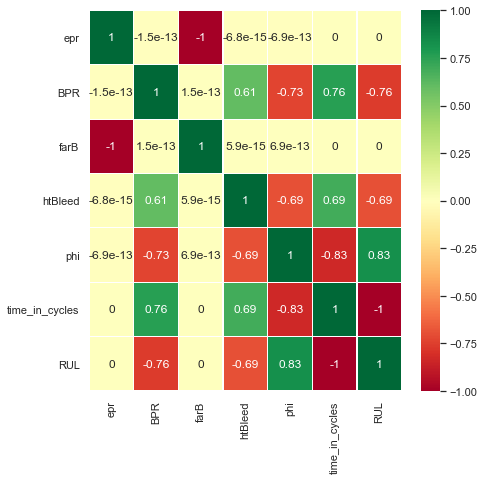

In [26]:
# matrice de correlation entre "RUL", "time_in cycle" et les variables sans unité 
sns.set()
cols = ['epr','BPR', 'farB', 'htBleed','phi','time_in_cycles',"RUL"]
sns.heatmap(moteur_perf[cols].corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(7,7)
plt.show()

### variation des capteurs en fonction de la variable d'intérêt ici  RUL dans la dataset d'entrainement

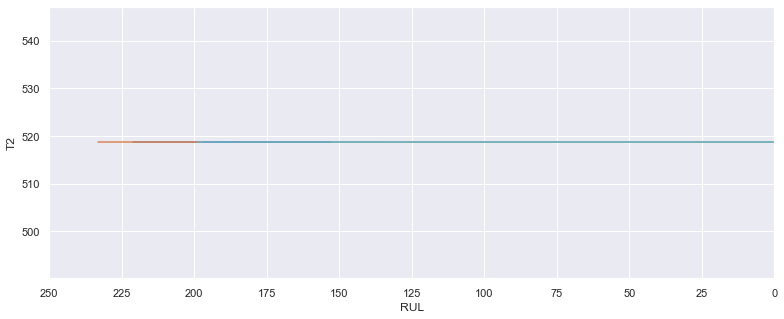

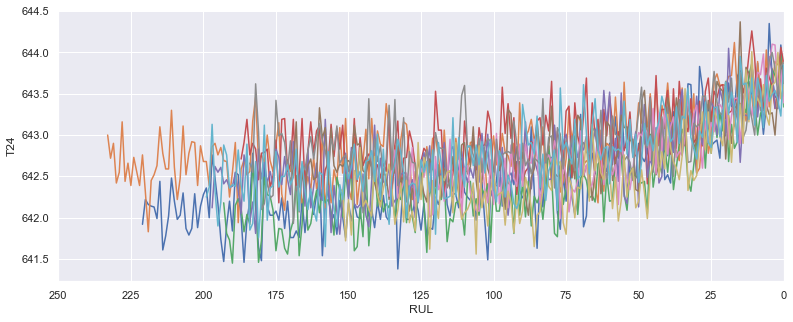

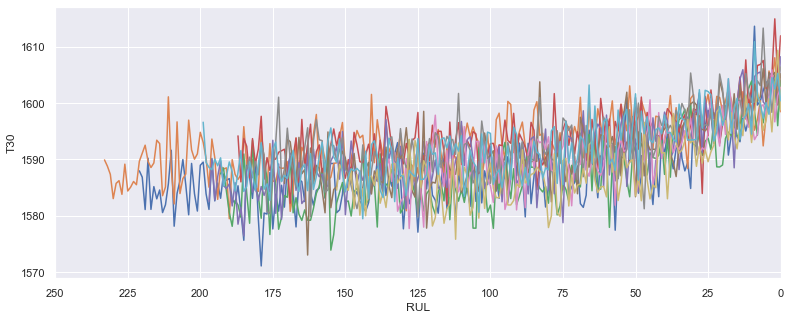

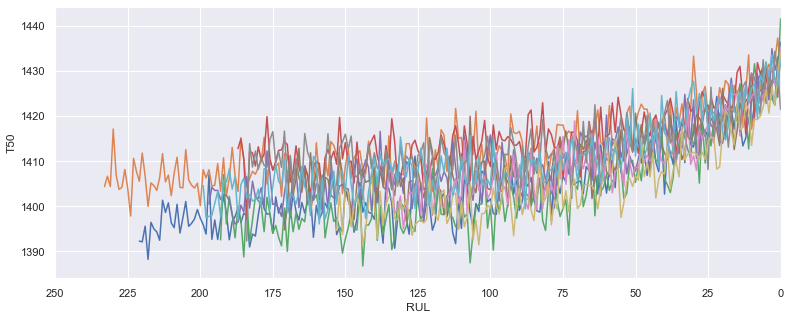

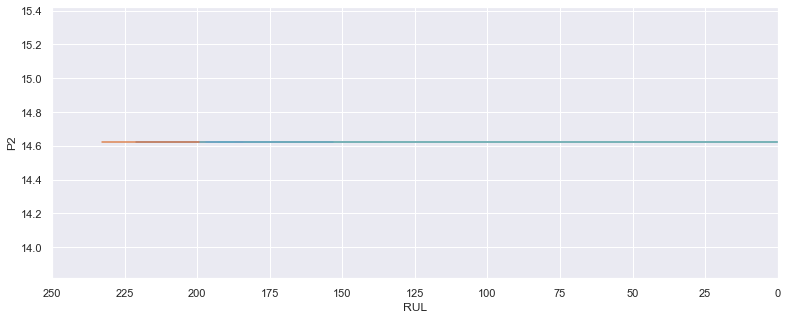

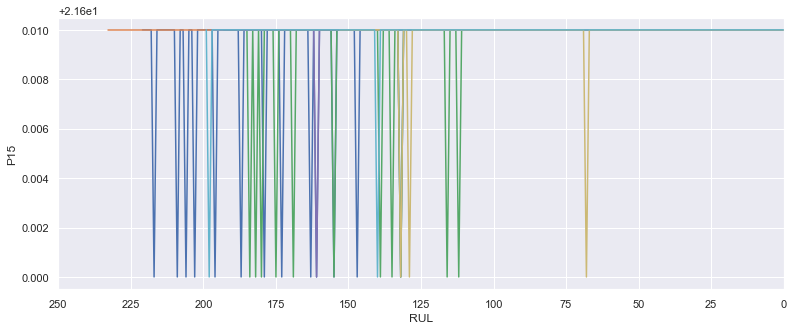

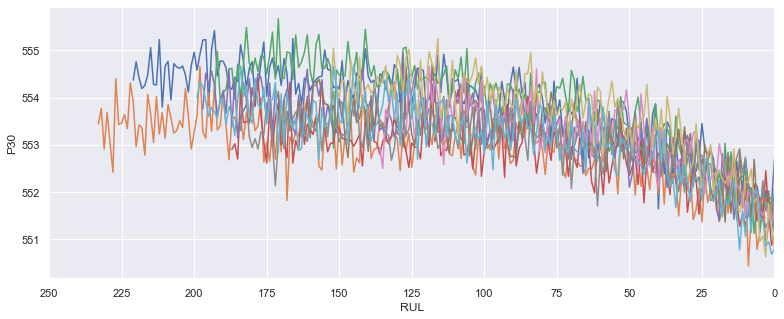

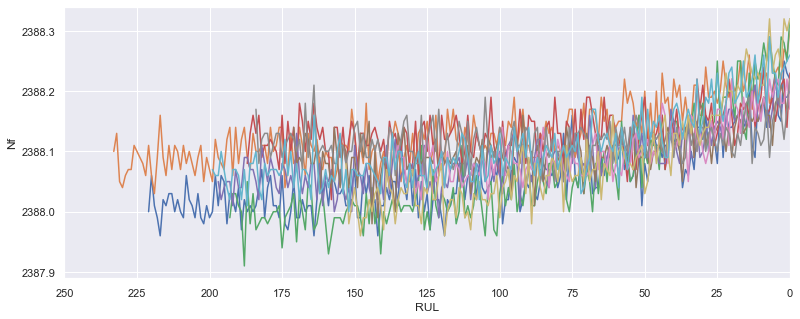

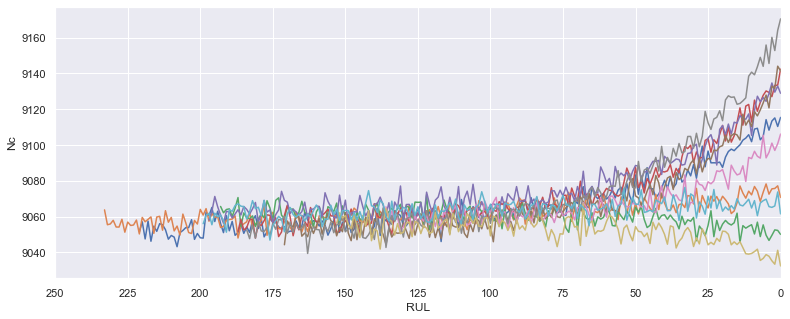

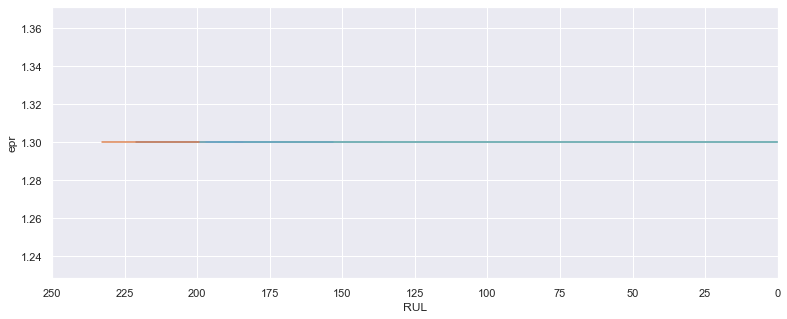

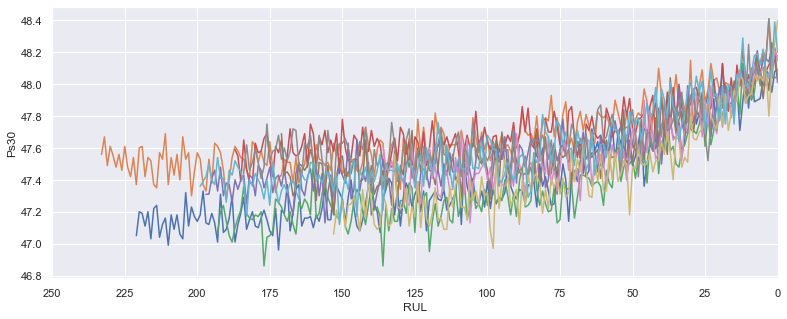

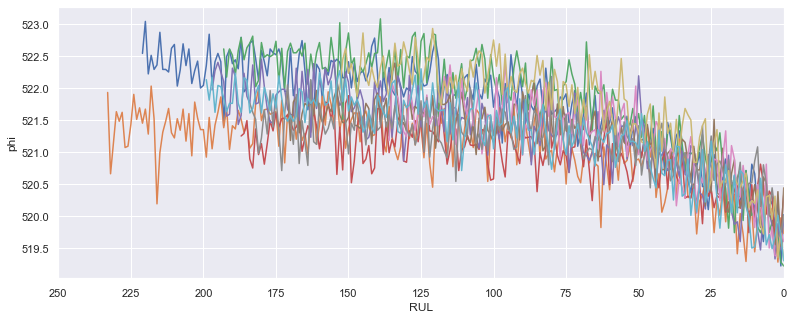

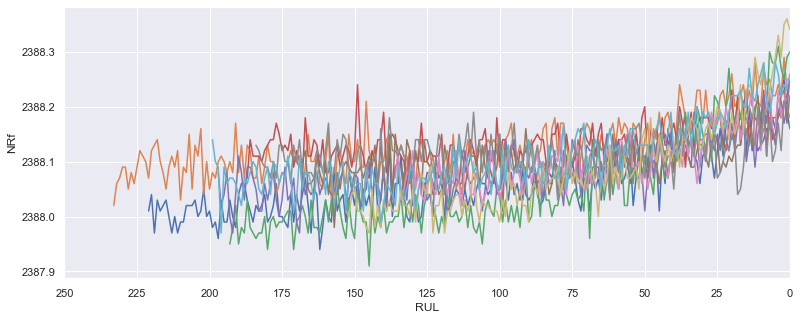

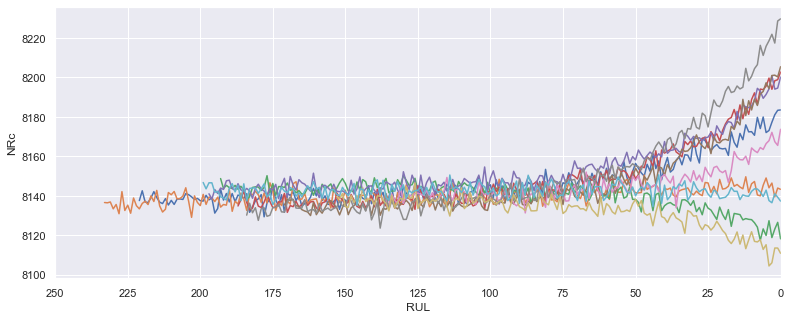

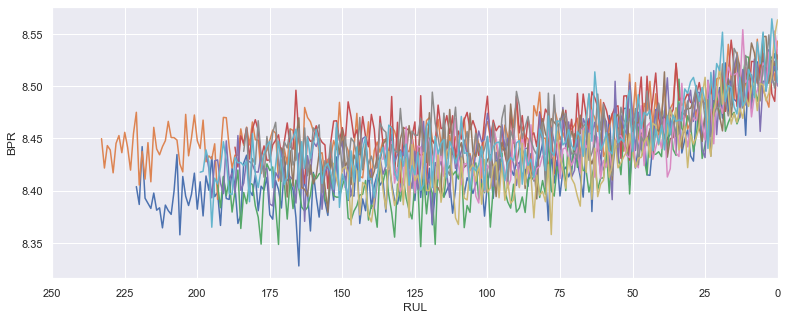

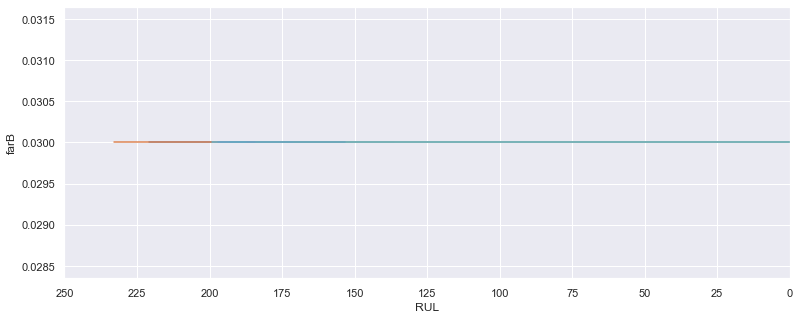

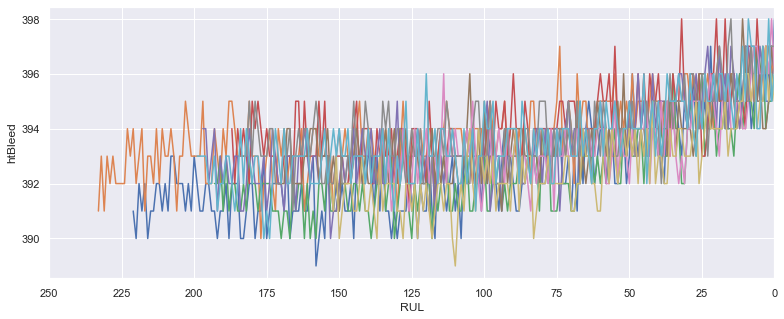

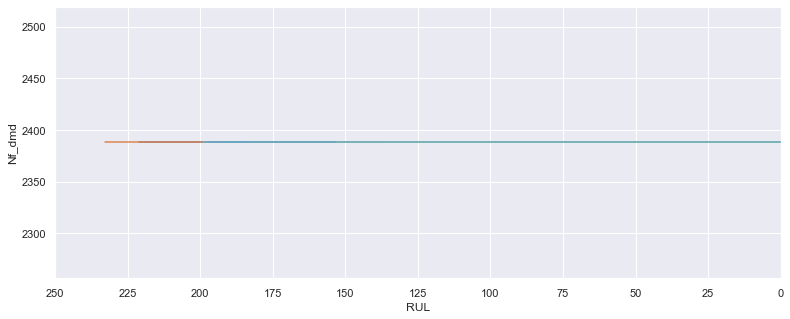

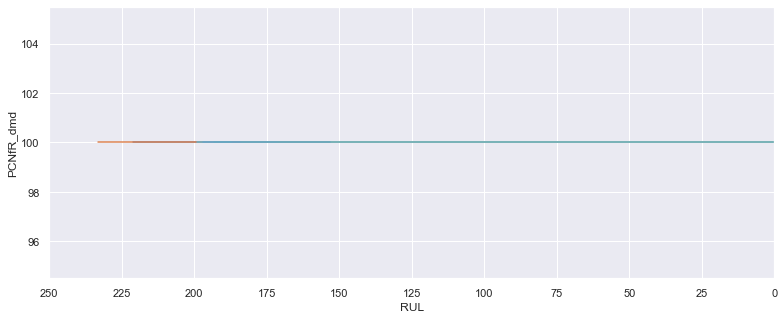

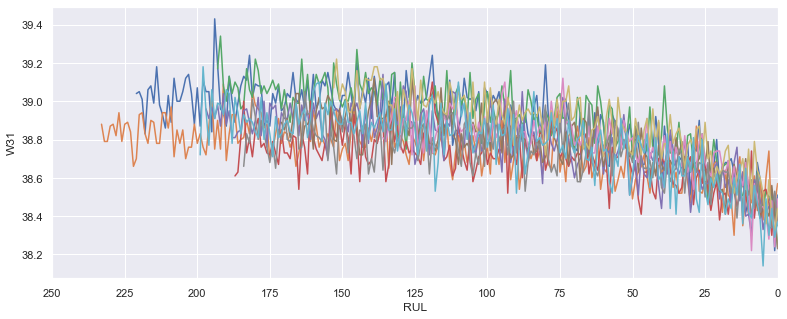

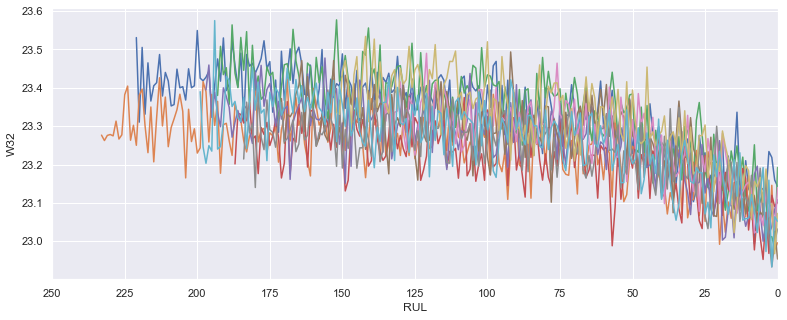

In [27]:
capteurs=  ['T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

#varaiation des capteurs en fonction du RUL de plusieurs moteurs
# on selectionnera uniquement les capteurs qui varient énormement avec le RUL

def plot_sensor(capteur):
    plt.figure(figsize=(13,5))
    for i in data_train['unit_number'].unique():
        #ON TRACE ICI uniquement les moteurs dont les numéros sont multiples de 10
        if (i % 10 == 0):   
            plt.plot('RUL', capteur, 
                     data=data_train[data_train['unit_number']==i])
            # Nous inversons l'axe X afin que RUL diminue le long de l'axe des abscisse
    plt.xlim(250, 0)  
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(capteur)
    plt.xlabel('RUL')
    plt.show()

# on plot les capteurs en fonction des RUL 
for capteur in capteurs:
    plot_sensor(capteur)


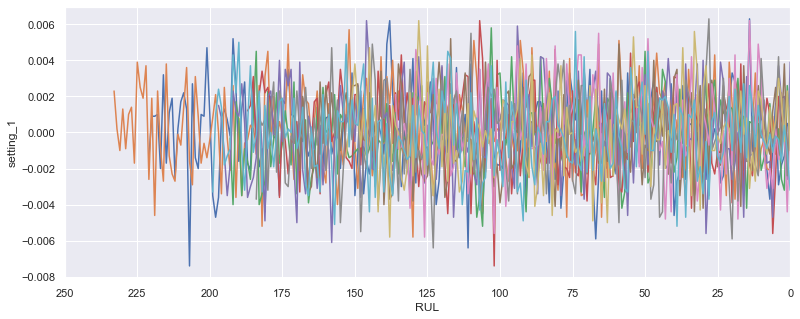

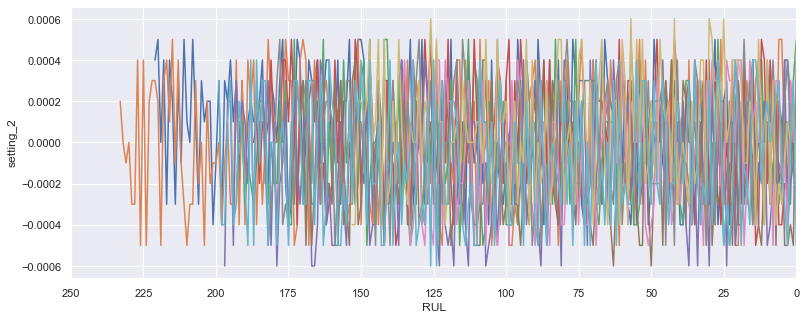

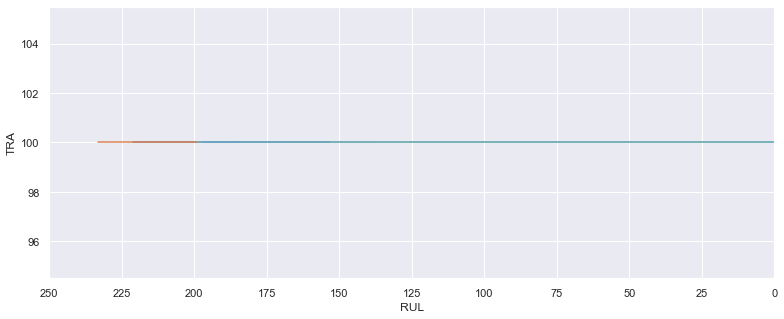

In [28]:
# paramètres de fonctionnement 
param_fonc = ['setting_1','setting_2','TRA']
for parm in param_fonc:
    plot_sensor(parm)

### Calcul de la panne dans la dataset data_test 

In [29]:
# on crée d'abord la colonne unit_number dans les données : data_RUL
columns_RUL = ['RUL_dernierMoteur']
data_RUL.columns = columns_RUL
data_RUL.insert(0, 'unit_number', range(1, 1 + len(data_RUL)))
data_RUL.head()



unit_number  RUL_dernierMoteur
0            1                112
1            2                 98
2            3                 69
3            4                 82
4            5                 91

In [30]:
# on fait pareil (cf data_train) pour les données data_test 

# on regroupe la data_test par moteur(unit_number ) et on calcule le maximun de chaque group
data_test_cycles_MAX = pd.DataFrame(data_test.groupby('unit_number')['time_in_cycles'].max()).reset_index()
# on attribue au sein de la data_test_cycles_MAX les noms des colonnes suivantes: ' unit_number' et 'cycles Max '
data_test_cycles_MAX.columns = ['unit_number', 'cyclesMax_interme']
#data_test_cycles_MAX

# on merge tout d'abord la data_test avec la data_RUL précedenment créée pour avoir accèes à la colonne 'RUL' du dernier moteur
#
data_test=data_test.merge(data_RUL,on=['unit_number'],how='left')

# on merge ensuite la data_test avec data_test_cycles_MAX précedenment créée pour avoir accèes à la colonne 'cycles Max '
#Qui servivar à créer la colonnes panne 'Failure'
data_test=data_test.merge(data_test_cycles_MAX,on=['unit_number'],how='left')
# calcul du RUL 
data_test['failure']=data_test['cyclesMax_interme']+data_test['RUL_dernierMoteur']
data_test['RUL']=data_test['failure']-data_test['time_in_cycles']
#data_test.drop(columns=[26,33],axis=1,inplace=True)
#data_train.drop(columns=['RUL_dernierMoteur'],inplace=True)
#,'cyclesMax_interme','failure'
data_test.head()

unit_number  time_in_cycles  setting_1  setting_2    TRA      T2     T24  \
0            1               1     0.0023     0.0003  100.0  518.67  643.02   
1            1               2    -0.0027    -0.0003  100.0  518.67  641.71   
2            1               3     0.0003     0.0001  100.0  518.67  642.46   
3            1               4     0.0042     0.0000  100.0  518.67  642.44   
4            1               5     0.0014     0.0000  100.0  518.67  642.51   

       T30      T50     P2  ...  farB  htBleed  Nf_dmd  PCNfR_dmd    W31  \
0  1585.29  1398.21  14.62  ...  0.03      392    2388      100.0  38.86   
1  1588.45  1395.42  14.62  ...  0.03      393    2388      100.0  39.02   
2  1586.94  1401.34  14.62  ...  0.03      393    2388      100.0  39.08   
3  1584.12  1406.42  14.62  ...  0.03      391    2388      100.0  39.00   
4  1587.19  1401.92  14.62  ...  0.03      390    2388      100.0  38.99   

       W32  RUL_dernierMoteur  cyclesMax_interme  failure  RUL  
0  23.3735                112                 31      143  142  
1  23.3916                112                 31      143  141  
2  23.4166                112                 31      143  140  
3  23.3737                112                 31      143  139  
4  23.4130                112                 31      143  138  

[5 rows x 30 columns]

In [31]:
#data_train["time_in_cycles"]
data_train_max

unit_number  time_in_cycles
0             1             192
1             2             287
2             3             179
3             4             189
4             5             269
..          ...             ...
95           96             336
96           97             202
97           98             156
98           99             185
99          100             200

[100 rows x 2 columns]

In [32]:
#data_train.to_excel('Entrainement.xlsx')

## Implémentation des modèles sur le jeu de données entraînement

In [90]:
#variables sélectionnées
Selection_colonne= ['T24','T30','T50','P30','Ps30','Nf','Nc','NRf','NRc','W31','W32','BPR','htBleed','phi']

#Partionnnement des données

X=data_train[Selection_colonne]
y= data_train['RUL']
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2,random_state=0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score

#Fonction evaluation 

def evaluation(y_true, y_pred, label='test'):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_pred)
    mae=mean_absolute_error(y_true, y_pred)
    #Accuracy = average_precision_score(y_true, y_pred)  
    print('{} set RMSE:{} ,MAE:{}, R2:{}'.format(label, rmse,mae,variance))


### Implémentation de la régression Linéaire

In [34]:
#Instanciation du modèle Lineaire
model=LinearRegression()

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model.fit(X_train,y_train )

#prédiction du modèle 
y_pred_train=model.predict(X_train)

#Evaluation du modèle 
evaluation(y_train ,y_pred_train,'train')

#prédiction du modèle en utilisant le 20% du jeu de données d'entraînement
y_pred_test=model.predict(X_valid)
#Evaluation du modèle 
evaluation(y_valid,y_pred_test)

train set RMSE:44.759988911594085 ,MAE:34.20297347615888, R2:0.5808530698939931
test set RMSE:44.31989025951968 ,MAE:33.93034427159258, R2:0.5731100217341258


### Implémentation du RF

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor param_dict
n_estimators = [10,25,40,55,70,85,100] # nombre d'arbres de décision
max_depth = [2,3,4,6,8,10,12] # profondeur des arbres
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth}

# Instanciation du modèle Random Forest
rf = RandomForestRegressor()
# Recherche du modèle du RF ayant ayant les meilleurs hyperparamètres
rf_random = RandomizedSearchCV(estimator = rf,param_distributions= param_dict)

rf_random.fit(X_train,y_train )
#On visualise le modèle optimisé
rf_optimal_model = rf_random.best_params_


In [92]:
rf_optimal_model

{'n_estimators': 85, 'max_depth': 12}

In [93]:
from sklearn.ensemble import RandomForestRegressor
# instanciation du modèle du RF 
model2= RandomForestRegressor(n_estimators=85 , max_depth = 12)

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model2.fit(X_train,y_train)

#prédiction du modèle
y_pred_train=model2.predict(X_train)
#Evaluation du modèle 
evaluation(y_train ,y_pred_train,'train')

#prédiction du modèle en utilisant le 20% du jeu de données d'entraînement
y_pred_test=model2.predict(X_valid)
#Evaluation du modèle
evaluation(y_valid,y_pred_test)


train set RMSE:31.425589180881712 ,MAE:21.85978843450051, R2:0.7933891108514374
test set RMSE:40.746095512927994 ,MAE:28.9453307940699, R2:0.6391799981585323


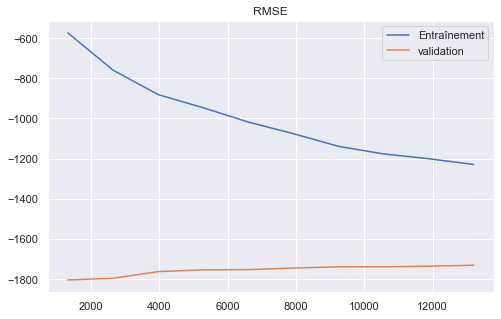

In [39]:
# tracage du Learning Curve Pour la visulatisation du sur-apprentissage ou pas du modèle avec le rmse
from sklearn.model_selection import learning_curve
N,train_score,val_score = learning_curve(model2,X_train,y_train,cv=5,train_sizes=np.linspace(0.1,1,10),scoring= 'neg_mean_squared_error' )
plt.figure(figsize=(8,5))
plt.plot(N,train_score.mean(axis=1))
plt.plot(N,val_score.mean(axis=1))
plt.title('RMSE')
plt.legend(('Entraînement','validation'), loc='upper right')

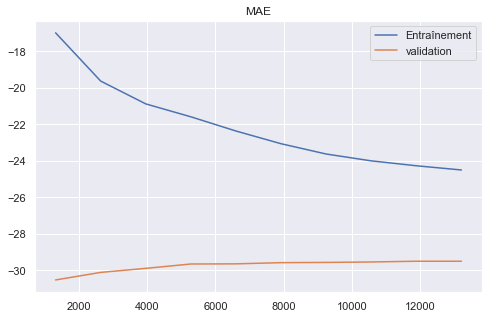

In [40]:
# tracage du Learning Curve Pour la visulatisation du sur-apprentissage ou pas du modèle MAE
from sklearn.model_selection import learning_curve
N,train_score,val_score = learning_curve(model2,X_train,y_train,cv=5,train_sizes=np.linspace(0.1,1,10),scoring= 'neg_mean_absolute_error' )
#Print du learning_curve
plt.figure(figsize=(8,5))
plt.plot(N,train_score.mean(axis=1))
plt.plot(N,val_score.mean(axis=1))
plt.title('MAE')
plt.legend(('Entraînement','validation'), loc='upper right')

### Implémentation du Xgboost

In [94]:
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBRegressor
# n_estimators:  nombre d'arbres de décision
# max_depth': profondeur des arbres
# learning_rate : pas d'apprentissage
# subsample: Nombre de lignes à utiliser pour la recherche du meilleurs hyperparamètres

# HYperparameter Dict
Param_grid = { 'learning_rate': [0.1,0.2,0.25,0.3,0.4,0.5],
              'max_depth':[1,2,4,6,8,10,11,12,13,14],
              'n_estimators':[10,25,40,55,70,100,125,150],
              'subsample':[0.1,0.2,0.4,0.6,0.8,1]             
             }

# Recherche du modèle du Xgboost ayant ayant les meilleurs hyperparamètres
grid= RandomizedSearchCV(XGBRegressor(),Param_grid,cv=5)
grid.fit(X_train,y_train)

#On visualise le modèle optimisé
grid.best_score_
grid.best_params_

#On sauvegarde la grille avec les meilleurs performance
Model3=grid.best_estimator_

#On visualise le modèle optimisé
Model3

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [96]:
grid.best_params_

{'subsample': 0.6, 'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.5}

In [97]:
import xgboost
from xgboost import XGBRegressor

#Instanciation du modèle du xgboost
model3= XGBRegressor(learning_rate=0.5,subsample=0.6,n_estimators=100, max_depth = 2)

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model3.fit(X_train,y_train)

#prédiction du modèle
y_pred_train=model3.predict(X_train)

#Evaluation du modèle
evaluation(y_train ,y_pred_train,'train')

#prédiction du modèle en utilisant le 20% du jeu de données d'entraînement
y_pred_test=model3.predict(X_valid)
#Evaluation du modèle sur le jeu de données test
evaluation(y_valid,y_pred_test)


train set RMSE:40.448706561633905 ,MAE:29.204126240247685, R2:0.6577088847832333
test set RMSE:41.99453382588059 ,MAE:30.40993878118981, R2:0.6167306097144802


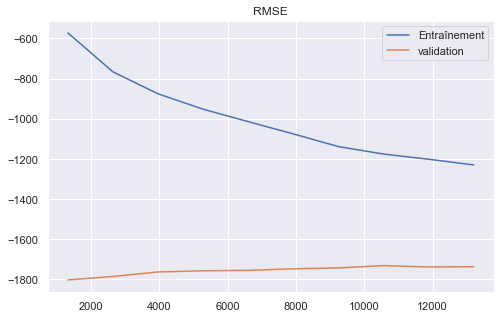

In [46]:
# tracage du Learning Curve Pour la visulatisation du sur-apprentissage ou pas du modèle selon le rmse

N,train_score,val_score = learning_curve(model2,X_train,y_train,cv=5,train_sizes=np.linspace(0.1,1,10),scoring= 'neg_mean_squared_error' )
plt.figure(figsize=(8,5))
plt.plot(N,train_score.mean(axis=1))
plt.plot(N,val_score.mean(axis=1))
plt.title('RMSE')
plt.legend(('Entraînement','validation'), loc='upper right')

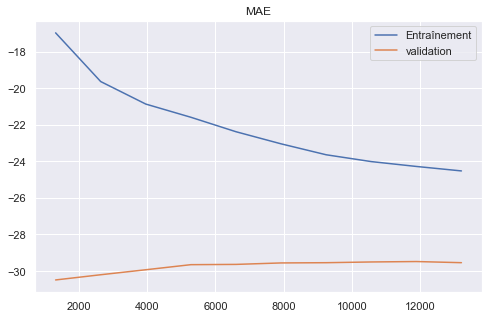

In [47]:
# tracage du Learning Curve Pour la visulatisation du sur-apprentissage ou pas du modèle selon le MAE

N,train_score,val_score = learning_curve(model2,X_train,y_train,cv=5,train_sizes=np.linspace(0.1,1,10),scoring= 'neg_mean_absolute_error' )
#Print du learning_curve
plt.figure(figsize=(8,5))
plt.plot(N,train_score.mean(axis=1))
plt.plot(N,val_score.mean(axis=1))
plt.title('MAE')
plt.legend(('Entraînement','validation'), loc='upper right')

In [50]:
#from sklearn.metrics import SCORERS
#sorted(SCORERS.keys())

## Implémentation du Random Forest sur le données_test

In [51]:
x_test = data_test[Selection_colonne]
y_test = data_test['RUL']

In [52]:

y_pred_test=model2.predict(x_test)

In [53]:
y_pred_test.shape

(13096,)

In [102]:
#Evaluation du RF sur le jeu de données test
evaluation(y_test_dernierM,y_pred_test)

test set RMSE:32.93017388167296 ,MAE:23.87482872301125, R2:0.37204502767480774


In [54]:
data1= pd.DataFrame(x_test)


In [55]:
data1.head()

T24      T30      T50     P30   Ps30       Nf       Nc      NRf  \
0  643.02  1585.29  1398.21  553.90  47.20  2388.04  9050.17  2388.03   
1  641.71  1588.45  1395.42  554.85  47.50  2388.01  9054.42  2388.06   
2  642.46  1586.94  1401.34  554.11  47.50  2388.05  9056.96  2388.03   
3  642.44  1584.12  1406.42  554.07  47.28  2388.03  9045.29  2388.05   
4  642.51  1587.19  1401.92  554.16  47.31  2388.01  9044.55  2388.03   

       NRc    W31      W32     BPR  htBleed     phi  
0  8125.55  38.86  23.3735  8.4052      392  521.72  
1  8139.62  39.02  23.3916  8.3803      393  522.16  
2  8130.10  39.08  23.4166  8.4441      393  521.97  
3  8132.90  39.00  23.3737  8.3917      391  521.38  
4  8129.54  38.99  23.4130  8.4031      390  522.15

In [56]:
data1['y_test']=y_test

In [57]:
data1['y_pred_test']=y_pred_test

In [58]:
unit_number =data_test['unit_number']
time_in_cycles=data_test['time_in_cycles']

In [59]:
data1['unit_number']=unit_number

data1['time_in_cycles']=time_in_cycles

In [60]:
data1.head()

T24      T30      T50     P30   Ps30       Nf       Nc      NRf  \
0  643.02  1585.29  1398.21  553.90  47.20  2388.04  9050.17  2388.03   
1  641.71  1588.45  1395.42  554.85  47.50  2388.01  9054.42  2388.06   
2  642.46  1586.94  1401.34  554.11  47.50  2388.05  9056.96  2388.03   
3  642.44  1584.12  1406.42  554.07  47.28  2388.03  9045.29  2388.05   
4  642.51  1587.19  1401.92  554.16  47.31  2388.01  9044.55  2388.03   

       NRc    W31      W32     BPR  htBleed     phi  y_test  y_pred_test  \
0  8125.55  38.86  23.3735  8.4052      392  521.72     142   179.503836   
1  8139.62  39.02  23.3916  8.3803      393  522.16     141   168.865463   
2  8130.10  39.08  23.4166  8.4441      393  521.97     140   162.547283   
3  8132.90  39.00  23.3737  8.3917      391  521.38     139   163.654996   
4  8129.54  38.99  23.4130  8.4031      390  522.15     138   179.137500   

   unit_number  time_in_cycles  
0            1               1  
1            1               2  
2            1               3  
3            1               4  
4            1               5

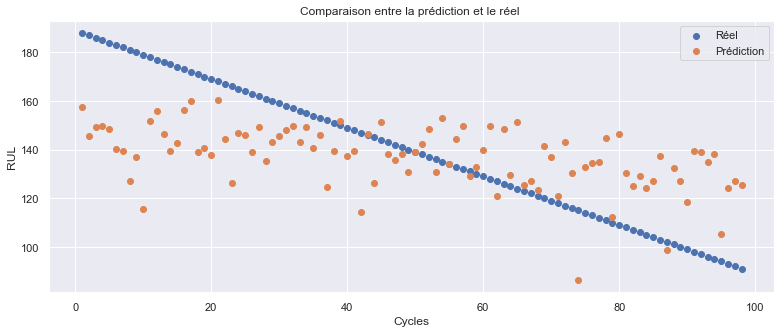

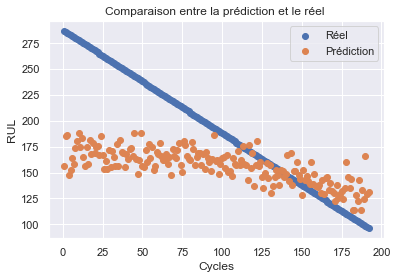

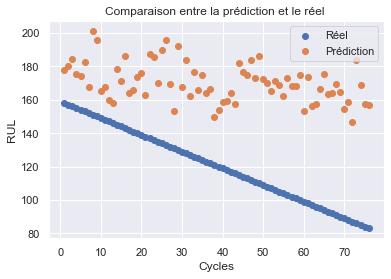

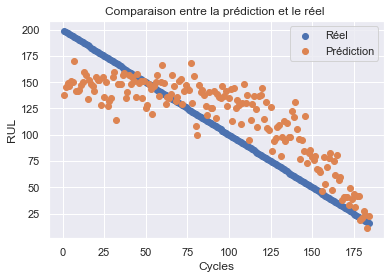

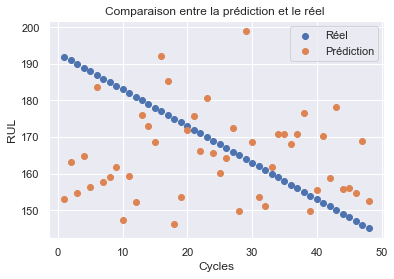

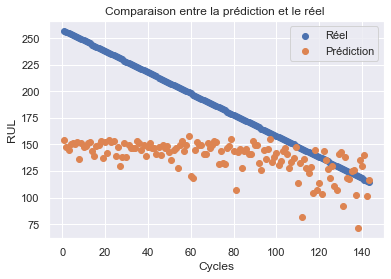

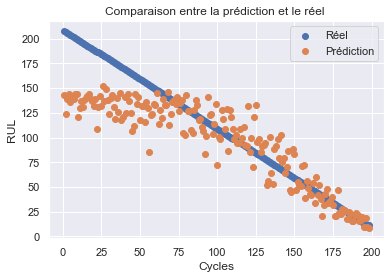

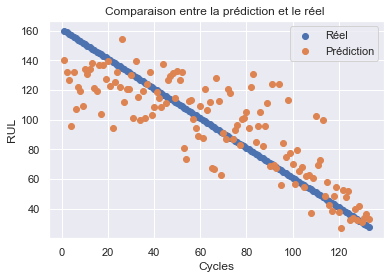

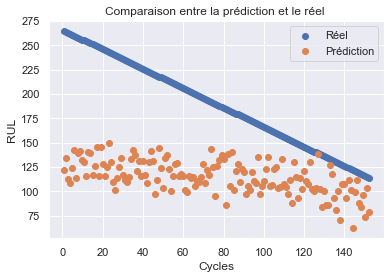

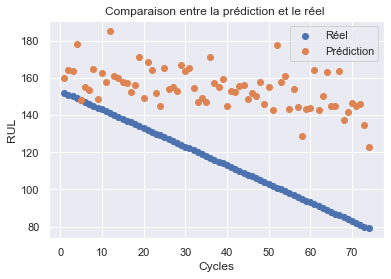

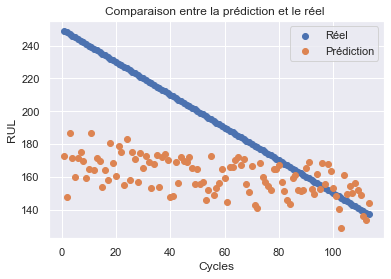

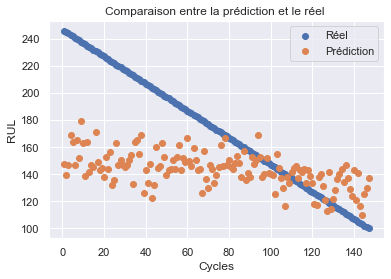

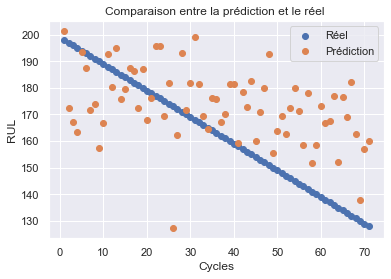

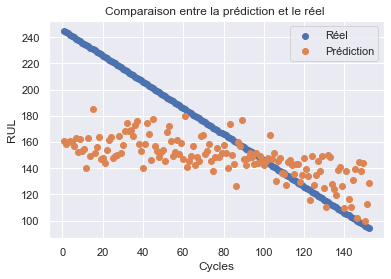

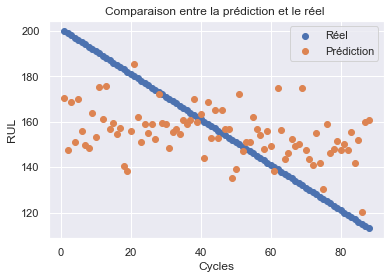

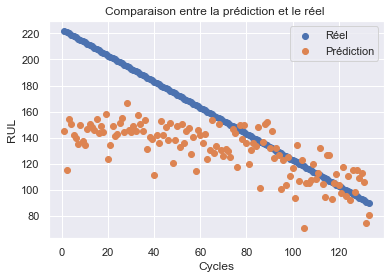

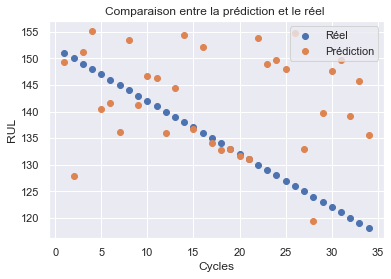

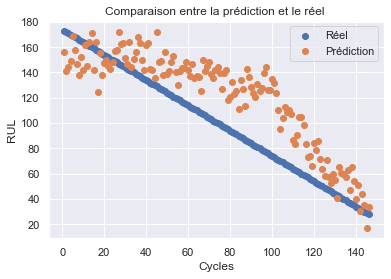

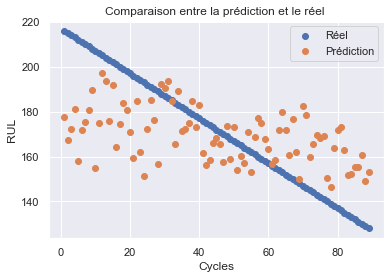

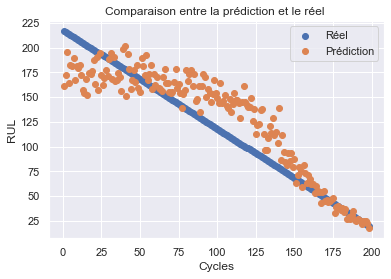

In [61]:
plt.figure(figsize=(13,5))
for i in data1['unit_number'].unique():
            #ON TRACE ICI uniquement les moteurs dont les numéros sont multiples de 5
        if (i % 5 == 0):
            data2=data1[data1['unit_number']==i]

            plt.scatter(data2['time_in_cycles'],data2['y_test'])
            plt.scatter(data2['time_in_cycles'],data2['y_pred_test'])
            
            plt.legend(('Réel', 'Prédiction'), loc='upper right')
            plt.title('Comparaison entre la prédiction et le réel ')
            
            plt.ylabel('RUL')
            plt.xlabel('Cycles')
            plt.show()

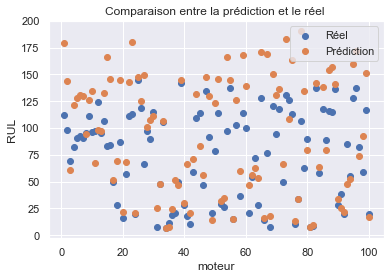

In [101]:
#Comparaison entre la prédiction et le réel
test = data_test[data_test['time_in_cycles'] == data_test['cyclesMax_interme']].reset_index()

x_test_dernierM = test[Selection_colonne]
y_test_dernierM = test['RUL']
y_pred_test=model2.predict(x_test_dernierM)

# On plote ce qu'il faut 
plt.scatter(test['unit_number'],y_test_dernierM)
plt.scatter(test['unit_number'],y_pred_test)
            
plt.legend(('Réel', 'Prédiction'), loc='upper right')
plt.title('Comparaison entre la prédiction et le réel ')
            
plt.ylabel('RUL')
plt.xlabel('moteur')
plt.show()

### Implémentation du xgboost sur le jeu de données test 

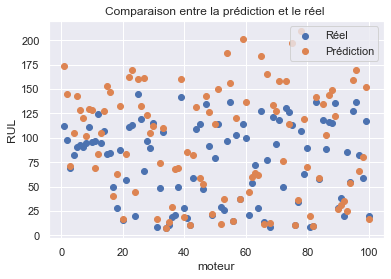

In [105]:
#Comparaison entre la prédiction et le réel
test = data_test[data_test['time_in_cycles'] == data_test['cyclesMax_interme']].reset_index()

x_test_dernierM = test[Selection_colonne]
y_test_dernierM = test['RUL']
y_pred_test=model3.predict(x_test_dernierM)
# On plote ce qu'il faut 
plt.scatter(test['unit_number'],y_test_dernierM)
plt.scatter(test['unit_number'],y_pred_test)
            
plt.legend(('Réel', 'Prédiction'), loc='upper right')
plt.title('Comparaison entre la prédiction et le réel ')
            
plt.ylabel('RUL')
plt.xlabel('moteur')
plt.show()

In [106]:
# Evaluation du modèle sur le jeu de donnée test
evaluation(y_test_dernierM,y_pred_test)

test set RMSE:35.95555306502955 ,MAE:26.643167982101442, R2:0.2513610777489187


In [65]:
data_train.head()

unit_number  time_in_cycles  setting_1  setting_2    TRA      T2     T24  \
0            1               1    -0.0007    -0.0004  100.0  518.67  641.82   
1            1               2     0.0019    -0.0003  100.0  518.67  642.15   
2            1               3    -0.0043     0.0003  100.0  518.67  642.35   
3            1               4     0.0007     0.0000  100.0  518.67  642.35   
4            1               5    -0.0019    -0.0002  100.0  518.67  642.37   

       T30      T50     P2  ...      NRc     BPR  farB  htBleed  Nf_dmd  \
0  1589.70  1400.60  14.62  ...  8138.62  8.4195  0.03      392    2388   
1  1591.82  1403.14  14.62  ...  8131.49  8.4318  0.03      392    2388   
2  1587.99  1404.20  14.62  ...  8133.23  8.4178  0.03      390    2388   
3  1582.79  1401.87  14.62  ...  8133.83  8.3682  0.03      392    2388   
4  1582.85  1406.22  14.62  ...  8133.80  8.4294  0.03      393    2388   

   PCNfR_dmd    W31      W32  failure  RUL  
0      100.0  39.06  23.4190      192  191  
1      100.0  39.00  23.4236      192  190  
2      100.0  38.95  23.3442      192  189  
3      100.0  38.88  23.3739      192  188  
4      100.0  38.90  23.4044      192  187  

[5 rows x 28 columns]

In [66]:
data_train.describe()

unit_number  time_in_cycles     setting_1     setting_2      TRA  \
count  20631.000000    20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568      108.807862     -0.000009      0.000002    100.0   
std       29.227633       68.880990      0.002187      0.000293      0.0   
min        1.000000        1.000000     -0.008700     -0.000600    100.0   
25%       26.000000       52.000000     -0.001500     -0.000200    100.0   
50%       52.000000      104.000000      0.000000      0.000000    100.0   
75%       77.000000      156.000000      0.001500      0.000300    100.0   
max      100.000000      362.000000      0.008700      0.000600    100.0   

                 T2           T24           T30           T50            P2  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      6.131150      9.000605  3.394700e-12   
min    5.186700e+02    641.210000   1571.040000   1382.250000  1.462000e+01   
25%    5.186700e+02    642.325000   1586.260000   1402.360000  1.462000e+01   
50%    5.186700e+02    642.640000   1590.100000   1408.040000  1.462000e+01   
75%    5.186700e+02    643.000000   1594.380000   1414.555000  1.462000e+01   
max    5.186700e+02    644.530000   1616.910000   1441.490000  1.462000e+01   

       ...           NRc           BPR          farB       htBleed   Nf_dmd  \
count  ...  20631.000000  20631.000000  2.063100e+04  20631.000000  20631.0   
mean   ...   8143.752722      8.442146  3.000000e-02    393.210654   2388.0   
std    ...     19.076176      0.037505  1.556432e-14      1.548763      0.0   
min    ...   8099.940000      8.324900  3.000000e-02    388.000000   2388.0   
25%    ...   8133.245000      8.414900  3.000000e-02    392.000000   2388.0   
50%    ...   8140.540000      8.438900  3.000000e-02    393.000000   2388.0   
75%    ...   8148.310000      8.465600  3.000000e-02    394.000000   2388.0   
max    ...   8293.720000      8.584800  3.000000e-02    400.000000   2388.0   

       PCNfR_dmd           W31           W32       failure           RUL  
count    20631.0  20631.000000  20631.000000  20631.000000  20631.000000  
mean       100.0     38.816271     23.289705    216.615724    107.807862  
std          0.0      0.180746      0.108251     50.028600     68.880990  
min        100.0     38.140000     22.894200    128.000000      0.000000  
25%        100.0     38.700000     23.221800    185.000000     51.000000  
50%        100.0     38.830000     23.297900    207.000000    103.000000  
75%        100.0     38.950000     23.366800    240.000000    155.000000  
max        100.0     39.430000     23.618400    362.000000    361.000000  

[8 rows x 28 columns]

In [67]:
data_test.loc[data_test['unit_number']==4][['unit_number','time_in_cycles']]

unit_number  time_in_cycles
206            4               1
207            4               2
208            4               3
209            4               4
210            4               5
..           ...             ...
307            4             102
308            4             103
309            4             104
310            4             105
311            4             106

[106 rows x 2 columns]

In [68]:
data_RUL.head()

unit_number  RUL_dernierMoteur
0            1                112
1            2                 98
2            3                 69
3            4                 82
4            5                 91

### Classification sur le jeu de données d'entrainement

In [69]:
# Définition du time to faillure: TTF
TTF=10
data_train['Label']=np.where(data_train['RUL']<=TTF,1,0)

In [70]:
data_train.head()

unit_number  time_in_cycles  setting_1  setting_2    TRA      T2     T24  \
0            1               1    -0.0007    -0.0004  100.0  518.67  641.82   
1            1               2     0.0019    -0.0003  100.0  518.67  642.15   
2            1               3    -0.0043     0.0003  100.0  518.67  642.35   
3            1               4     0.0007     0.0000  100.0  518.67  642.35   
4            1               5    -0.0019    -0.0002  100.0  518.67  642.37   

       T30      T50     P2  ...     BPR  farB  htBleed  Nf_dmd  PCNfR_dmd  \
0  1589.70  1400.60  14.62  ...  8.4195  0.03      392    2388      100.0   
1  1591.82  1403.14  14.62  ...  8.4318  0.03      392    2388      100.0   
2  1587.99  1404.20  14.62  ...  8.4178  0.03      390    2388      100.0   
3  1582.79  1401.87  14.62  ...  8.3682  0.03      392    2388      100.0   
4  1582.85  1406.22  14.62  ...  8.4294  0.03      393    2388      100.0   

     W31      W32  failure  RUL  Label  
0  39.06  23.4190      192  191      0  
1  39.00  23.4236      192  190      0  
2  38.95  23.3442      192  189      0  
3  38.88  23.3739      192  188      0  
4  38.90  23.4044      192  187      0  

[5 rows x 29 columns]

In [71]:
Selection_colonne= ['T24','T30','T50','P30','Ps30','Nf','Nc','NRf','NRc','W31','W32','BPR','htBleed','phi']

X=data_train[Selection_colonne]
y= data_train['Label']

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2,random_state=0)

In [72]:
y.shape

(20631,)

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Recall : donne la sensibilité du modèle. Permet de réduire  à maxium le faux Négatif 
# Précision : Permet de réduire  à maxium le taux positive
# f1_score : rapport entre Précision\Recall

def classification_report(y_true,y_pred,label):
    label='test'
    F1_score = round(f1_score(y_true,y_pred),2)
    Sensibilite=round(recall_score(y_true,y_pred),2)
    
    print('{} set F1_score:{} ,Sensibilite:{}'.format(label,F1_score, Sensibilite))

    
                 
#Créatuion de la fonction permettant d'évaluer nos modèle pour la classification

#matrice de confusion
def confusion_matrice(y_true,y_pred):
    plt.figure(figsize=(7,5))
    sns.heatmap(confusion_matrix(y_true,y_pred), annot=True,fmt='.5g')
    plt.xlabel('réel')
    plt.ylabel('prédiction')
    return



#### Recherche de meilleurs paramètres pour le Random Forest Classifier

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


#Random Forest Regressor param_dict
n_estimators = [10,25,40,55,70,85,100] # nombre des arbres
max_depth = [2,3,4,6,8,10,12] # profondeurs des arbres
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth}

# Instanciation du modèle Random Forest
rf = RandomForestClassifier()
# Recherche des meilleurs hyperparamètres
rf_random = RandomizedSearchCV(estimator = rf,param_distributions= param_dict)

rf_random.fit(X_train,y_train )
#On cherche le meilleur modèle
rf_optimal_model = rf_random.best_params_


#### implémentation du Random Forest Classifier

In [75]:
rf_optimal_model

{'n_estimators': 55, 'max_depth': 8}

test set F1_score:0.84 ,Sensibilite:0.83


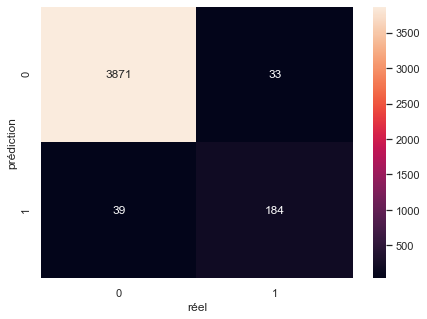

In [76]:
#Implémentation du Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# instanciation du modèle du RF 
model4= RandomForestClassifier(n_estimators=70 , max_depth = 10)

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model4.fit(X_train,y_train)
#prédiction du modèle 
y_pred_train=model4.predict(X_train)

#prédiction du modèle en utilisant le 20% du jeu de données d'entraînement
y_pred_test=model4.predict(X_valid)

# réportage de l'implémentation
classification_report(y_valid,y_pred_test,'test')

#Matrice de confusion
confusion_matrice(y_valid,y_pred_test)


#### Recherche de meilleurs paramètres pour le xgboost Classifier

In [77]:

import xgboost
from xgboost import XGBClassifier

Param_grid = { 'learning_rate': [0.1,0.2,0.25,0.3,0.4,0.5],
              'max_depth':[1,2,4,6,8,10,11,12,13,14],
              'n_estimators':[10,25,40,55,70,100,125,150],
              'subsample':[0.1,0.2,0.4,0.6,0.8,1]
              
             }

grid= RandomizedSearchCV(XGBClassifier(),Param_grid,cv=5)

#On entraine La grille avec fit comme s’il s’agissait d’un estimateur’
grid.fit(X_train,y_train)

grid.best_score_
grid.best_params_
#On sauvegarde la grille ave les meilleurs performances
Model5=grid.best_estimator_


Model5 # Daans la vraie vie 

C:\Users\debon\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:24:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:26:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=125, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

[14:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test set F1_score:0.83 ,Sensibilite:0.82


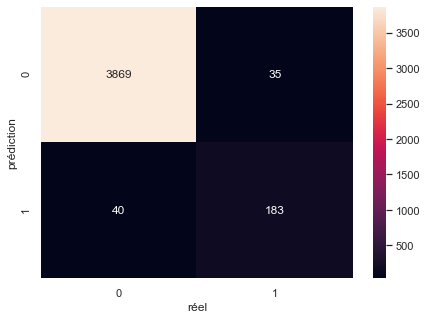

In [79]:
model5= XGBClassifier(n_estimators=150,learning_rate=0.4,max_depth=11,subsample=1)

#Entrainement du modèle avec 80% du jeu de données d'entraînement
model5.fit(X_train,y_train)
#prédiction du modèle 
y_pred_train=model5.predict(X_train)

#prédiction du modèle en utilisant le 20% du jeu de données d'entraînement
y_pred_test=model5.predict(X_valid)

# réportage de l'implémentation
classification_report(y_valid,y_pred_test,'test')
#Matrice de confusion
confusion_matrice(y_valid,y_pred_test)


### Test sur les données data_test

In [80]:
# création de la variable Label dans le donnée d'entrainement 
# Définition du Time to faillure : TTF
TTF=10
data_test['Label']=np.where(data_test['RUL']<=TTF,1,0)

#on Recuper les dernier points des srie temporelle du data_test car on veut prédire le RUL dans 
test = data_test[data_test['time_in_cycles'] == data_test['cyclesMax_interme']].reset_index()

x_test = test[Selection_colonne]
y_test = test['RUL_dernierMoteur']


In [81]:
#Créaction du DataFrame Prediction pour 
prediction = pd.DataFrame()
prediction ['foretA'] =  model4.predict(x_test)
prediction['XGBC'] = model5.predict(x_test)
prediction['RUL_dernierMoteur']=y_test
prediction['label'] = np.where(y_test <= TTF, 1, 0 )
prediction['unit_number'] = prediction.index + 1

In [82]:
prediction.head()

foretA  XGBC  RUL_dernierMoteur  label  unit_number
0       0     0                112      0            1
1       0     0                 98      0            2
2       0     0                 69      0            3
3       0     0                 82      0            4
4       0     0                 91      0            5

In [83]:
# Les moteurs le moins bien prédit par Le random Forest
prediction[prediction['label']!=prediction ['foretA']]


foretA  XGBC  RUL_dernierMoteur  label  unit_number
30       0     0                  8      1           31
34       1     1                 11      0           35
41       0     0                 10      1           42
67       0     0                  8      1           68
75       0     0                 10      1           76

In [84]:
# Les moteurs le moins bien prédit par Le Xgboost
prediction[prediction['label']!=prediction ['XGBC']]

foretA  XGBC  RUL_dernierMoteur  label  unit_number
30       0     0                  8      1           31
34       1     1                 11      0           35
41       0     0                 10      1           42
67       0     0                  8      1           68
75       0     0                 10      1           76

test set F1_score:0.55 ,Sensibilite:0.43


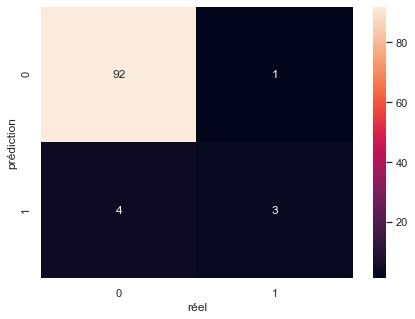

In [85]:
classification_report(prediction['label'],prediction ['foretA'],'test')
confusion_matrice(prediction['label'],prediction ['foretA'])


test set F1_score:0.55 ,Sensibilite:0.43


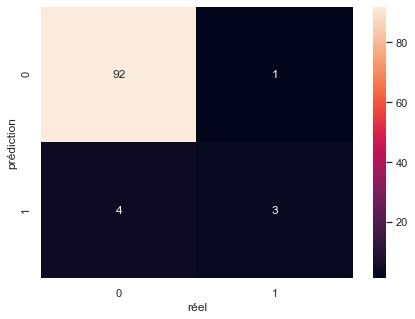

In [86]:
classification_report(prediction['label'],prediction ['XGBC'],'test')
confusion_matrice(prediction['label'],prediction ['XGBC'])
